In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [34]:
df_listing = pd.read_csv('data/listings.csv')
print(df_listing.columns)

df_listing = df_listing[['id', 'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms', 'bedrooms',]]

Index(['id', 'listing_url', 'name', 'experiences_offered', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people'],
      dtype='object')


In [35]:
df_boston = pd.read_csv('data/reviews_boston.csv')
print(df_boston.columns)
df_boston = df_boston[['listing_id','comments']]
df_cambridge = pd.read_csv('data/reviews_cambridge.csv')[['listing_id','comments']]

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


In [36]:
df_comments = pd.concat([df_boston,df_cambridge])
df_comments = pd.merge(left=df_comments,right=df_listing,
                       how='inner',left_on='listing_id',right_on='id')
df_comments.head()

,listing_id,comments,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms
0,3781,The apartment was as advertised and Frank was ...,3781,42.36524,-71.02936,Apartment,Entire home/apt,1.0,1.0
1,3781,It was a pleasure to stay at Frank's place. Th...,3781,42.36524,-71.02936,Apartment,Entire home/apt,1.0,1.0
2,3781,The apartment description is entirely faithful...,3781,42.36524,-71.02936,Apartment,Entire home/apt,1.0,1.0
3,3781,Thoroughly enjoyed my time at Frank's home. Ha...,3781,42.36524,-71.02936,Apartment,Entire home/apt,1.0,1.0
4,3781,Great value for the money! This location has e...,3781,42.36524,-71.02936,Apartment,Entire home/apt,1.0,1.0


In [38]:
mask = ((df_comments.property_type=='Apartment') & (df_comments.bathrooms>=2))
text = " ".join(str(c).lower() for c in df_comments.loc[mask].comments)

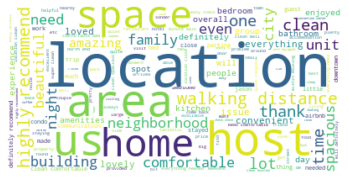

In [45]:
stopwords = set(STOPWORDS)
stopwords.update(["boston","cambridge","apartment","house","room",
                  "great","nice","good","perfect","wonderful","really",
                  "place","stay"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()